In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

# 1. Exploratory Data Analysis

In [2]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')

print('The shape of the training set:', a.shape[0], 'houses and', a.shape[1], 'features.')
print('The shape of the testing set:', b.shape[0], 'houses and', b.shape[1], 'features.')
print('The testing set has 1 feature less than the training set which is the target (SalePrice) to predict.')

The shape of the training set: 1460 houses and 81 features.
The shape of the testing set: 1459 houses and 80 features.
The testing set has 1 feature less than the training set which is the target (SalePrice) to predict.


In [3]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


have a look first at the correlation between numerical features and the target ``SalePrice``, to have a first idea of the connections between features.

*It is not necessary to include the ``Id`` feature into the analysis!*

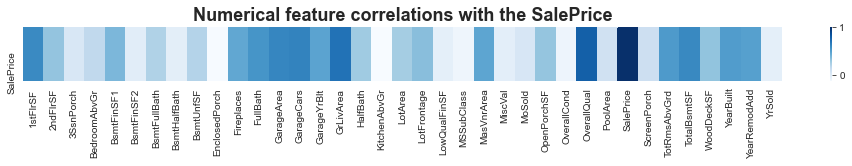

In [4]:
num = a.select_dtypes(exclude='object')# to remove string columns
numcorr = num[num.columns.difference(['Id'])].corr()
f, ax = plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title("Numerical feature correlations with the SalePrice", weight='bold', fontsize=18)
plt.show()


To have a better idea,  sort the features according to their correlations with the ``SalePrice``.

In [5]:
numcorr['SalePrice'].sort_values(ascending=False).head(20).to_frame().T


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath
SalePrice,1.0,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.38642,0.351799,0.324413,0.319334,0.315856,0.284108


The **overall quality**, **the living area, basement area, garage cars and garage area** have the highest correlation values 


Let's before dig in categorical features clean the data from missing values


# missing values



 combine  the train and test datasets to run all the data munging and applying feature engineering on both of them.

In [6]:
trainsize = a.shape[0] # the length of the train raw data set
testsize = b.shape[0]  # the length of the test raw data set
y_train = a['SalePrice'].to_frame()
y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [7]:
#Combine train and test sets
c = pd.concat((a, b), sort=False).reset_index(drop=True)
c.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
# converting column names to lower case and removing space for easier coding 

c.columns = c.columns.str.lower()
c.columns = c.columns.str.replace(' ', '')
c.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [9]:
for col in c.columns:
        print (col)
        if c[col].dtype == np.object:
            print ('% None: ', (len(c[c[col] == 'None'])/2051)*100)
        else:
            print ('% zeros: ', (len(c[c[col] == 0])/2051)*100)
        print ('\n')

id
% zeros:  0.0


mssubclass
% zeros:  0.0


mszoning
% None:  0.0


lotfrontage
% zeros:  0.0


lotarea
% zeros:  0.0


street
% None:  0.0


alley
% None:  0.0


lotshape
% None:  0.0


landcontour
% None:  0.0


utilities
% None:  0.0


lotconfig
% None:  0.0


landslope
% None:  0.0


neighborhood
% None:  0.0


condition1
% None:  0.0


condition2
% None:  0.0


bldgtype
% None:  0.0


housestyle
% None:  0.0


overallqual
% zeros:  0.0


overallcond
% zeros:  0.0


yearbuilt
% zeros:  0.0


yearremodadd
% zeros:  0.0


roofstyle
% None:  0.0


roofmatl
% None:  0.0


exterior1st
% None:  0.0


exterior2nd
% None:  0.0


masvnrtype
% None:  84.93417844953682


masvnrarea
% zeros:  84.73915163334958


exterqual
% None:  0.0


extercond
% None:  0.0


foundation
% None:  0.0


bsmtqual
% None:  0.0


bsmtcond
% None:  0.0


bsmtexposure
% None:  0.0


bsmtfintype1
% None:  0.0


bsmtfinsf1
% zeros:  45.29497805948318


bsmtfintype2
% None:  0.0


bsmtfinsf2
% zeros:  125.3534861043

#### Drop columns with high % of 0 or None. These columns are have low correlation with sale price and will have minimal impact on sale price.
   - bsmtfinsf2 (high % of 0)
   - miscval (high % of 0)
   - lowqualfinsf (high % of 0)
   - alley (high % of None)
   - fence (high % of None)
   - miscfeature (high % of None)

#### Drop columns with high % of the same value and low correlation with sale price. 
- street
- utilities 
- heating
- bsmtfintype2 
- centralair
- saletype
- bsmtcond
- extercond
- garagequal

In [10]:
c.drop(['bsmtfinsf2', 'miscval', 'lowqualfinsf', 'alley', 'fence', 'miscfeature','street', 
            'utilities', 'heating', 'bsmtfintype2', 'centralair', 'saletype', 'bsmtcond', 'extercond','garagequal'],
           axis = 1, inplace = True)
#Drop the target "SalePrice" and Id columns
c.drop(['saleprice'], axis=1, inplace=True)
c.drop(['id'], axis=1, inplace=True)
print(c.shape)


(2919, 64)


#### Drop columns with strong collinearity
- totalbsmtsf
- totrmsabvgrd
- garagecars

In [11]:
c.drop(['totalbsmtsf', 'totrmsabvgrd', 'garagecars'], axis = 1, inplace = True)

In [12]:
len(c)*0.15

437.84999999999997

Features with more than 15% missing values

In [13]:
c.isnull().sum().sort_values(ascending=False)[c.isnull().sum()>len(c)*0.15]

poolqc         2909
fireplacequ    1420
lotfrontage     486
dtype: int64

In [14]:
def mvrateplot(df, title):
    df = df.drop(df[df == 0].index).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    df.plot.barh(color='Blue')
    plt.title(title, fontsize=20, weight='bold' )
    plt.show()

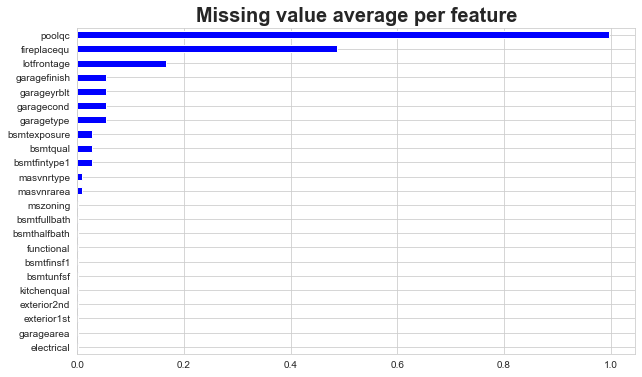

In [15]:
mvrateplot(c.isnull().mean(),'Missing value average per feature')

# 2. Data Cleaning

 Keep only features with at least 85 percent non-Na values.

In [16]:
oldlen = c.shape[1]
oldset = set(c)

In [17]:

c= c.dropna(thresh = len(c)*0.9, axis=1)
c.name = 'c'
print(oldlen-c.shape[1], 'features with each more than 15% of missing values are dropped from the combined dataset.')
print('The dropped features are:', list(oldset-set(c)))
print(f"--> Total size of the combined dataset {c.name} after dropping features with more than 90% M.V.:",c.shape)

3 features with each more than 15% of missing values are dropped from the combined dataset.
The dropped features are: ['poolqc', 'lotfrontage', 'fireplacequ']
--> Total size of the combined dataset c after dropping features with more than 90% M.V.: (2919, 58)


Before cleaning the data, let's have look at the features with missing values. Some features have 1 or 2 missing values, and some have more

In [18]:
allna =c.isnull().sum().sort_values(ascending=False)[c.isnull().sum()>0]
allna

garagefinish    159
garageyrblt     159
garagecond      159
garagetype      157
bsmtexposure     82
bsmtqual         81
bsmtfintype1     79
masvnrtype       24
masvnrarea       23
mszoning          4
bsmthalfbath      2
functional        2
bsmtfullbath      2
electrical        1
bsmtfinsf1        1
exterior2nd       1
exterior1st       1
bsmtunfsf         1
kitchenqual       1
garagearea        1
dtype: int64

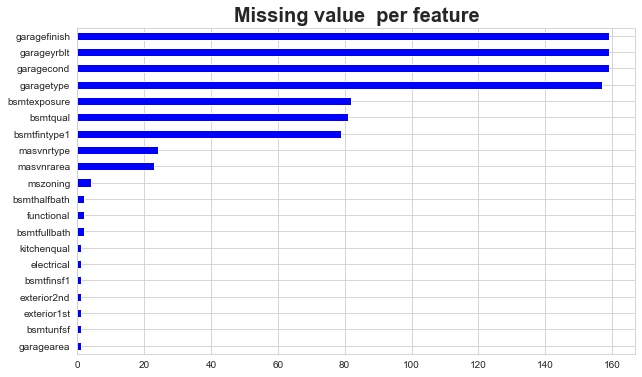

In [19]:
mvrateplot(allna, 'Missing value  per feature')

We isolate the missing values from the rest of the dataset to have a good idea of how to treat them. 

Let's create a NA dataframe composed of only features with M.V. Then, we split them to:
* Categorical features
* Numerical features

In [20]:
NA = c[allna.index]
NAcat = NA.select_dtypes(include='object')
NAnum = NA.select_dtypes(exclude='object')
print(f'There are {NAcat.shape[1]} categorical features with missing values')
print(f'There are {NAnum.shape[1]} numerical features with missing values')

There are 13 categorical features with missing values
There are 7 numerical features with missing values


As we can see, there are 18 categorical features and 10 numerical features to clean.
# numerical features
 First thing to do is to have a look at them to learn more about their distribution and decide how to clean them:


In [21]:
NAnum.isnull().sum().head(18).to_frame().sort_values(by=[0]).T

,bsmtfinsf1,bsmtunfsf,garagearea,bsmthalfbath,bsmtfullbath,masvnrarea,garageyrblt
0,1,1,1,2,2,23,159


- Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
- GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1979).

* For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns, we will fill with 0's because they just mean that the hosue doesn't have a basement, bathrooms or a garage.

In [22]:
c['garageyrblt'] = c['garageyrblt'].fillna(c['garageyrblt'].median())

In [23]:
for col in c.columns:
    if c[col].dtype != "object":
         c[col] = c[col].fillna(0)

# Categorical features
Concerning the 18 Categorical features with missing values:
* Some features have less than 5 missing values, so we will just use the forward fill method 
* we will fill the categorical missing values with 'None'

Let's display the number of missing values per categorical feature:

In [24]:
NAcat.isnull().sum().head(18).to_frame().sort_values(by=[0]).T

,electrical,exterior2nd,exterior1st,kitchenqual,functional,mszoning,masvnrtype,bsmtfintype1,bsmtqual,bsmtexposure,garagetype,garagefinish,garagecond
0,1,1,1,1,2,4,24,79,81,82,157,159,159


categorical features having just few missing values, as example the number of M.V. less than 5. 

Lest's locate these features and then we fill the gap with forward fill method:

In [25]:
mvthreshold = 4

print(f'The categorical features having a number of M.V. less or equal to {mvthreshold}:\n', 
      list(NAcat.columns[NAcat.isnull().sum()<=mvthreshold]))

The categorical features having a number of M.V. less or equal to 4:
 ['mszoning', 'functional', 'electrical', 'exterior2nd', 'exterior1st', 'kitchenqual']


In [26]:
NAcat.columns[NAcat.isnull().sum()<=mvthreshold]

Index(['mszoning', 'functional', 'electrical', 'exterior2nd', 'exterior1st',
       'kitchenqual'],
      dtype='object')

In [27]:
for f in list(NAcat.columns[NAcat.isnull().sum()<=mvthreshold]):
    c[f] = c[f].fillna(method='ffill')
 

In [28]:
for col in c.columns:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")
   

Checking if the dataframe ``c`` contains yet missing values:

In [29]:
c.isnull().sum().sort_values(ascending=False).head()

salecondition    0
yearbuilt        0
bsmtfintype1     0
bsmtexposure     0
bsmtqual         0
dtype: int64

#### New columns to indicate presence of features
These features seem to have strong positive correlation with sale price. Thus, columns to indicate their presence in the house will be added
- porch
    - drop: 3ssnporch, enclosedporch, openporchsf, screenporch

- garage
- fireplace
- bsmt
- masvnr

In [30]:
# porch
porch_col = ['3ssnporch','enclosedporch','openporchsf','screenporch']
c['porch'] = c[porch_col].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
c.drop(porch_col, axis = 1, inplace = True)

c['porch'].unique()

array([1, 0], dtype=int64)

In [31]:
#garage, fireplace, bsmt, masvnr
c['garage'] = c['garagearea'].apply(lambda x: 1 if x > 0 else 0)
c['fireplace'] = c['fireplaces'].apply(lambda x: 1 if x > 0 else 0)
c['bsmt'] = c['bsmtqual'].apply(lambda x: 0 if x == 'None' else 1)
c['masvnr'] = c['masvnrarea'].apply(lambda x: 1 if x > 0 else 0)

print(f" garage unique values: {c['garage'].unique()}")
print(f" fireplace unique values: {c['fireplace'].unique()}")
print(f" bsmt unique values: {c['bsmt'].unique()}")
print(f" masvnr unique values: {c['masvnr'].unique()}")

 garage unique values: [1 0]
 fireplace unique values: [0 1]
 bsmt unique values: [1 0]
 masvnr unique values: [1 0]




# 3. Feature Engineering



Bathrooms**: All the bathroom

agesold : Indicate age of house when sold 

remodelled: Indicate if house was remodelled before 
 


In [32]:
c['bathrooms'] = c['fullbath'] + c['halfbath']*0.5+ c['bsmthalfbath']*0.5+c['bsmtfullbath']
c.drop(['fullbath' ,'halfbath','bsmthalfbath','bsmtfullbath'], axis = 1, inplace = True)

In [33]:
#agesold
c['agesold'] = c['yrsold']-c['yearbuilt']


In [34]:
#remodelled
c['remodelled'] = np.where(c['yearremodadd'] == c['yearbuilt'], 1, 0)
print(c['remodelled'].unique())
c.drop(['yearremodadd'], axis = 1, inplace = True)


[1 0]


### Drop 'garageyrblt'
Most garages built same year as house (yearbuilt) - high collinearity 
- 1564 of 2051 garages in train dataset built in same year as house

### Dealing with 'grlivarea', '1stflrsf', '2ndflrsf'

Many of the values are the same 
- grlivarea = total sq ft of all floors in house
    - grlivarea and 1stflrsf will be same if house only has 1 floor
    - 2018 of 2051 houses have grlivarea = 1stflrsf + 2ndflrsf

Drop 1stflrsf column 

2ndflrsf will be converted from "area" column to column indicating presence
- New '2ndflr' column
    - Presence (value = 1)
    - No presence (value = 0)
- Drop '2ndflrsf'

In [35]:
c.drop(['garageyrblt', '1stflrsf'], axis = 1, inplace = True)

In [36]:
# #2ndflr
# c['2ndflr'] = c['2ndflrsf'].apply(lambda x: 1 if x > 0 else 0)
# c.drop(['2ndflrsf'], axis = 1, inplace = True)
# print(f" 2ndflr unique values: {c['2ndflr'].unique()}")

### Modifications to columns
- landslope
    - group Sev with Mod into new 'sloped' value
    - if Gtl, will reflect as flat

In [37]:
# c['landslope'] = c['landslope'].apply(lambda x: 'flat' if x == 'Gtl' else 'sloped')
# c['landslope'].value_counts()

# 4. Encoding Categorical Features

#### Convert mssubclass to string instead of float as it is categorical

In [38]:
c['mssubclass'] = c['mssubclass'].apply(str)

In [39]:
cb = pd.get_dummies(c) 
cb.shape

(2919, 240)

In [40]:
Train = cb[:trainsize]
Test  = cb[trainsize:]
print(Test.shape)
print(Train.shape)

(1459, 240)
(1460, 240)


# 5. Detecting Outliers

go back to our original train dataset to visualize the important features / Sale price scatter plots to find outliersa

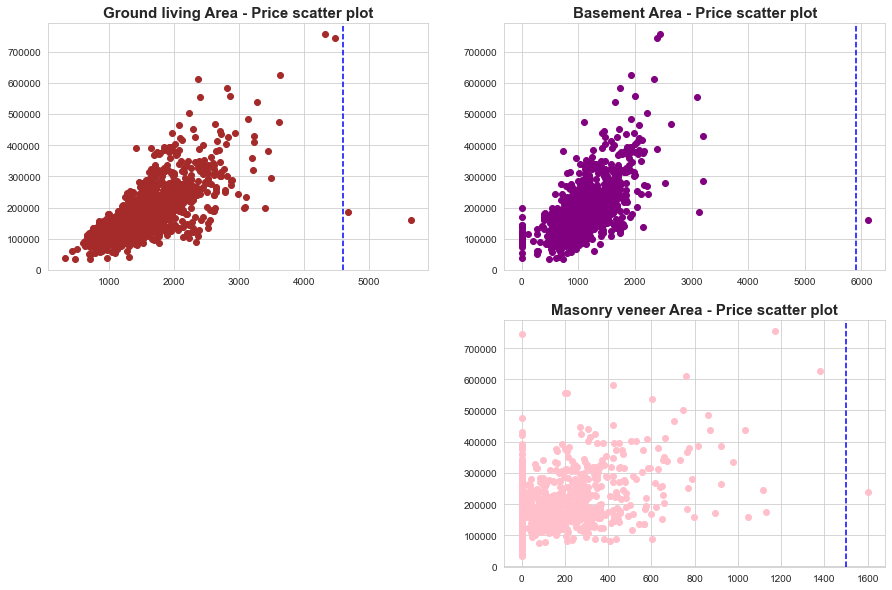

In [41]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('brown'))
plt.axvline(x=4600, color='b', linestyle= '--')
plt.title('Ground living Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('purple'))
plt.axvline(x=5900, color='b', linestyle= '--')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

# ax1 = plt.subplot2grid((2,2),(1,0))
# plt.scatter(x=a['OverallQual'], y=a['SalePrice'], color=('darkblue'))
# plt.axvline(x=4000, color='b', linestyle= '--')
# plt.title('Overall Quality  - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('pink'))
plt.axvline(x=1500, color='b', linestyle= '--')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

The outliers are the points in the right that have a larger area but a very low sale price. We localize those points by sorting their respective columns

* The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: **the outlier with index number 1298. **
* We detect the outlier 297 in MasVnrArea.

In [42]:
print(a['GrLivArea'].sort_values(ascending=False).head(2))
print('*'*30)
print(a['TotalBsmtSF'].sort_values(ascending=False).head(1))
print('*'*30)
print(a['MasVnrArea'].sort_values(ascending=False).head(1))
print('*'*30)
# print(a['1stFlrSF'].sort_values(ascending=False).head(1))

1298    5642
523     4676
Name: GrLivArea, dtype: int64
******************************
1298    6110
Name: TotalBsmtSF, dtype: int64
******************************
297    1600.0
Name: MasVnrArea, dtype: float64
******************************


We can safety remove those 3 outliers by creating a new dataframe without these index (297, 523, 1298)

In [43]:
train = Train[(Train['grlivarea'] < 4600) & (Train['masvnrarea'] < 1500)]

print(f'--> {Train.shape[0]-train.shape[0]} outliers are removed from the train dataset.')

--> 3 outliers are removed from the train dataset.


In [44]:
target = a[['SalePrice']]
outliers = [1298, 523, 297]
target.drop(target.index[outliers], inplace=True)

In [45]:
print('Make sure that both train and target sets have the same row number after removing the outliers:')
print('Train:', train.shape[0], 'rows')
print('Target:', target.shape[0], 'rows')

Make sure that both train and target sets have the same row number after removing the outliers:
Train: 1457 rows
Target: 1457 rows


# 6. Building Machine Learning Models

In [46]:
print(train.shape)
print(target.shape)
print(Test.shape)

(1457, 240)
(1457, 1)
(1459, 240)


> ### Log tranform the target because it's skewed to the right

We will apply **np.log1p** to the skewed features. (To get the original values back, we will apply **np.expm1** at the end of the study after training and testing the models. 

In [47]:
target["SalePrice"] = np.log1p(target["SalePrice"])

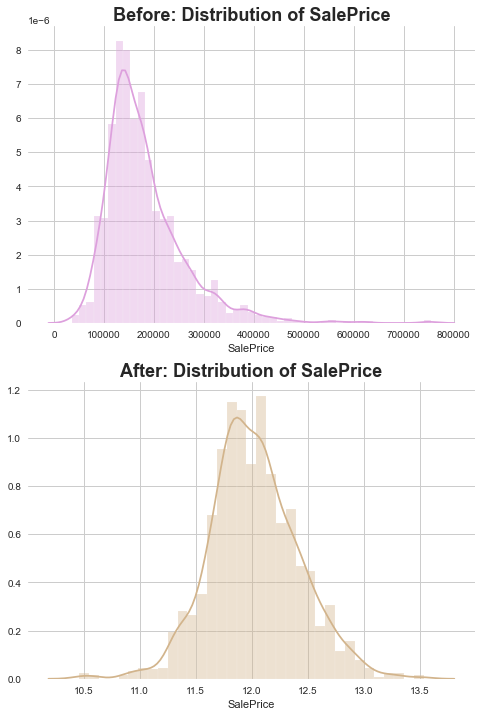

In [48]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,12))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,1),(0,0))
sns.distplot(np.expm1(target["SalePrice"]), color='plum')
plt.title('Before: Distribution of SalePrice',weight='bold', fontsize=18)
#first row, second col
ax1 = plt.subplot2grid((2,1),(1,0))
sns.distplot(target["SalePrice"], color='tan')
plt.title('After: Distribution of SalePrice',weight='bold', fontsize=18)
plt.show()

In [49]:
X = train
y = target['SalePrice']


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
#scale data 
ss=StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [52]:
#hyperparameter  elastic net

enet = ElasticNetCV(alphas = np.arange(0.001, 1.0, 0.005), l1_ratio=0.5)
enet = enet.fit(X_train, y_train)
enet_optimal_alpha = enet.alpha_
print (f" enet optimal alpha is {enet_optimal_alpha}")
print(' ')


 enet optimal alpha is 0.006
 


In [53]:
#instantiating elastic net model

enet_opt = ElasticNet(alpha=enet_optimal_alpha)

In [54]:
#fit model and deriving r2 scores for train, test and RMSE for test set
enet_opt.fit(X_train, y_train)
print (f" enet regression model: r2 score for train set is {enet_opt.score(X_train, y_train)}")
print (f" enet regression model: r2 score for test set is {enet_opt.score(X_test, y_test)}")
enet_pred = enet_opt.predict(X_test)
enet_rmse = (mean_squared_error(y_test, enet_pred))**0.5
print (f" enet regression model: RMSE is {enet_rmse}")

 enet regression model: r2 score for train set is 0.9361563674549174
 enet regression model: r2 score for test set is 0.9153410826118965
 enet regression model: RMSE is 0.11653152572305582


In [55]:
pred = enet_opt.predict(X_train)
pred.mean()

12.030177848848124

In [56]:
y.mean()

12.02376792997262

## Production model on test data

The production model will be used on the test data to see if the r2 score and RMSE is close to the scores from the train data

In [57]:
X1 = Test
X1.shape

(1459, 240)

In [58]:
X_train.shape

(1165, 240)

In [59]:
X1 = ss.transform(X1)

In [60]:
test_predictions = enet_opt.predict(X1)

In [61]:
test_predictions.mean()

12.013368272688957

In [62]:
np.expm1(test_predictions).mean()

179024.75551497578

In [63]:
submission = pd.DataFrame({'Id':b['Id'], 'SalePrice':np.expm1(test_predictions)})
#submission = pd.DataFrame({'Id':b['Id'], 'SalePrice':test_predictions})
submission.head()

,Id,SalePrice
0,1461,126085.070778
1,1462,157433.364174
2,1463,177383.188487
3,1464,198125.207082
4,1465,195644.058945


In [64]:
submission.shape

(1459, 2)

In [65]:
#exporting submission.csv
submission.to_csv('sample_submission.csv', index=False)

In [66]:
p = pd.read_csv('sample_submission.csv')
o = pd.read_csv('test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)


0.08802169011081659
